In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.colors as mcolors
from gekko import GEKKO

#### Linear Combination

$\vec{v_1} + \vec{v_2} = \vec{v_3}$



In [3]:
def plot_2d_vector(vector, color):
    return ax.arrow(0,0,vector[0],vector[1], head_width=0.1, head_length=0.1, color=color)

In [4]:
i_hat = np.array([1,0])
j_hat = np.array([0,1])

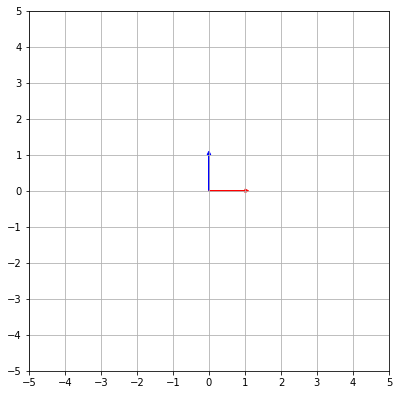

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(j_hat, "blue")
plot_2d_vector(i_hat, "red")

plt.show()

In [6]:
v_1 = i_hat*2
v_2 = j_hat*3

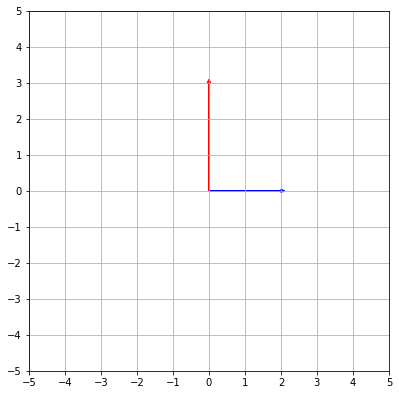

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(v_1, "blue")
plot_2d_vector(v_2, "red")

plt.show()

### dddddddddddddddddddddddddddd

In [8]:
## LC stands for linear combination
def plot_2d_vector_LC(v1, v2): 
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    
    grid = ax.grid()
    xaxis_locator = ax.xaxis.set_major_locator(MultipleLocator(1.00))
    yaxis_locator = ax.yaxis.set_major_locator(MultipleLocator(1.00))
    
    ##########################################################
    
    v3 = np.array(v1) + np.array(v2)
    
    color_list = list(mcolors.BASE_COLORS.keys())
    color_list.remove('w')
    color_list.remove('r')
    #random.seed(0)
    inx = random.sample(np.arange(0,6).tolist(),3)
    
    colors = []
    for i in inx: 
        colors.append(color_list[i])
        
    v1_arrow = ax.arrow(0,0, v1[0], v1[1], color=colors[0], head_width=0.1, head_length=0.1)
    v2_arrow = ax.arrow(0,0, v2[0], v2[1], color=colors[1], head_width=0.1, head_length=0.1)
    v3_arrow = ax.arrow(0,0, v3[0], v3[1], color='r', head_width=0.1, head_length=0.1)
    
    v2_alpha_arrow = ax.arrow(v1[0],v1[1], v2[0], v2[1], color=colors[1], head_width=0.1, head_length=0.1)
    
    max_value = int(np.concatenate((v1,v2,v3)).max()+1)
    
    x_limit = ax.set_xlim([-max_value, max_value])
    y_limit = ax.set_ylim([-max_value, max_value])
    
    
    v1_annot = ax.annotate(f'({v1[0]},{v1[1]})',(v1[0],v1[1]))
    v2_annot = ax.annotate(f'({v2[0]},{v2[1]})',(v2[0],v2[1]))
    v3_annot = ax.annotate(f'({v3[0]},{v3[1]})',(v3[0],v3[1]))
    
    return grid, xaxis_locator, yaxis_locator, v1_arrow, v2_arrow, v3_arrow, v2_alpha_arrow, x_limit, y_limit, v1_annot, v2_annot, v3_annot

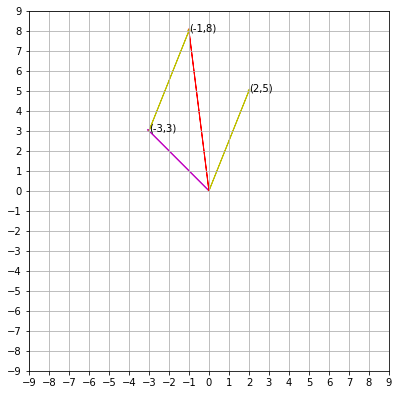

In [9]:
plot_2d_vector_LC([-3,3],[2,5])
plt.show()

In [10]:
v_1 = np.array([2,-1])
v_2 = np.array([-1,2])

In [11]:
target_value = np.array([0,3])

In [12]:
def solve_for_xy(v_1, v_2, target_value):
    m = GEKKO()
    x = m.Var()
    y = m.Var()
    m.Equation(v_1[0]*x + v_2[0]*y == target_value[0])
    m.Equation(v_1[1]*x + v_2[1]*y == target_value[1])
    m.solve(disp=False)
    x_value = x[0]
    y_value = y[0]
    
    return x_value, y_value

In [13]:
v_1[0]

2

In [14]:
def generate_Ys (x, v_1, v_2, target_value):
    
    eq1_left = v_1[0]*x - target_value[0]
    eq1_right = -1*(v_2[0])
    eq1_Y = eq1_left / eq1_right
    
    eq2_left = v_1[1]*x - target_value[1]
    eq2_right = -1*(v_2[1])
    eq2_Y = eq2_left / eq2_right
    
    return eq1_Y, eq2_Y

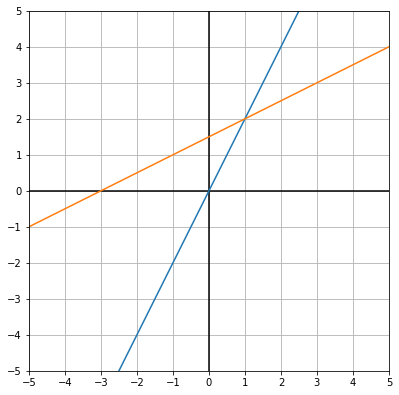

In [15]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

ax.axvline(x=0, color="black")
ax.axhline(y=0, color="black")

x = np.arange(-5,6,1)

Y_1 = generate_Ys(x, v_1, v_2, target_value)[0]
Y_2 = generate_Ys(x, v_1, v_2, target_value)[1]

ax.plot(x, Y_1)
ax.plot(x, Y_2)

plt.show()

### ddddddddddddddddddd

### Function for the first plot

In [16]:
## LC stands for linear combination
def plot_2d_vector_LC_integral(ax, v1, v2, target_value): 
    
    v1 = np.asarray(v1)
    v2 = np.asarray(v2)
    
    #ax = fig.add_axes([0,0,1,1])
    
    grid = ax.grid()
    xaxis_locator = ax.xaxis.set_major_locator(MultipleLocator(1.00))
    yaxis_locator = ax.yaxis.set_major_locator(MultipleLocator(1.00))
    
    ##########################################################
    
    v3 = np.array(v1) + np.array(v2)
    
    color_list = list(mcolors.BASE_COLORS.keys())
    color_list.remove('w')
    color_list.remove('r')
    random.seed(0)
    inx = random.sample(np.arange(0,6).tolist(),3)
    
    colors = []
    for i in inx: 
        colors.append(color_list[i])
        
    v1_arrow = ax.arrow(0,0, v1[0], v1[1], color=colors[0], head_width=0.1, head_length=0.1)
    v2_arrow = ax.arrow(0,0, v2[0], v2[1], color=colors[1], head_width=0.1, head_length=0.1)
    v3_arrow = ax.arrow(0,0, v3[0], v3[1], color='r', head_width=0.1, head_length=0.1, width=0.1)
    
    v2_alpha_arrow = ax.arrow(v1[0],v1[1], v2[0], v2[1], color=colors[1], head_width=0.1, head_length=0.1)
    
    max_value = int(abs(np.concatenate((v1,v2,v3))).max()+3)
    
    x_limit = ax.set_xlim([-max_value, max_value])
    y_limit = ax.set_ylim([-max_value, max_value])
    
    
    v1_annot = ax.annotate(f'({v1[0]},{v1[1]})',(v1[0],v1[1]))
    v2_annot = ax.annotate(f'({v2[0]},{v2[1]})',(v2[0],v2[1]))
    v3_annot = ax.annotate(f'({v3[0]},{v3[1]})',(v3[0],v3[1]))
    
    ax.axvline(x=0, color="black")
    ax.axhline(y=0, color="black")
    
    description_1 = f'''
    Here, I have two vectors. {v1} and {v2}. 
    And if we do the linear combination of the two vectors 
    without scaling, then we get {v1+v2}
    
    There are many different ways to make use of vectors. 
    But in here, we would like to set a certain target value, such as {target_value}.
    
    So, with the given two vectors, we get the target value by scaling the vectors, 
    and then compute the linear combination of the two scaled vectors.
    
    In other words, we would like to make this red vector, {v1+v2} to {target_value}. 
    '''
    ax.text(max_value, 0, description_1,fontsize='large', fontfamily='serif')
    
    return grid, xaxis_locator, yaxis_locator, v1_arrow, v2_arrow, v3_arrow, v2_alpha_arrow, x_limit, y_limit, v1_annot, v2_annot, v3_annot

### Function for the second plot

In [17]:
def generate_Ys (x, v_1, v_2, target_value):
    
    v_1 = np.asarray(v_1)
    v_2 = np.asarray(v_2)
    target_value = np.asarray(target_value)
    
    eq1_left = v_1[0]*x - target_value[0]
    eq1_right = -1*(v_2[0])
    eq1_Y = eq1_left / eq1_right
    
    eq2_left = v_1[1]*x - target_value[1]
    eq2_right = -1*(v_2[1])
    eq2_Y = eq2_left / eq2_right
    
    return eq1_Y, eq2_Y


def solve_for_xy(v_1, v_2, target_value):
    
    v_1 = np.asarray(v_1)
    v_2 = np.asarray(v_2)
    target_value = np.asarray(target_value)
    
    m = GEKKO()
    x = m.Var()
    y = m.Var()
    m.Equation(v_1[0]*x + v_2[0]*y == target_value[0])
    m.Equation(v_1[1]*x + v_2[1]*y == target_value[1])
    m.solve(disp=False)
    x_value = round(x[0],2)
    y_value = round(y[0],2)
    
    return x_value, y_value


def plot_equations_on_xy_coord(ax, v_1, v_2, target_value):
    
    v_1 = np.asarray(v_1)
    v_2 = np.asarray(v_2)
    target_value = np.asarray(target_value)
    
    ax.grid()

    ax.xaxis.set_major_locator(MultipleLocator(1.00))
    ax.yaxis.set_major_locator(MultipleLocator(1.00))

    ax.axvline(x=0, color="black")
    ax.axhline(y=0, color="black")

    x = np.arange(-5,6,1)

    Y_1 = generate_Ys(x, v_1, v_2, target_value)[0]
    Y_2 = generate_Ys(x, v_1, v_2, target_value)[1]

    str1 = f'({v_1[0]}X) + ({v_2[0]}Y) = {target_value[0]}'
    str2 = f'({v_1[1]}X) + ({v_2[1]}Y) = {target_value[1]}'
    
    ax.plot(x, Y_1, label = str1)
    ax.plot(x, Y_2, label = str2)
    
    xy = solve_for_xy(v_1, v_2, target_value)
    
    max_value = abs(xy[1])+3
    
    ax.set_xlim(-max_value,max_value)
    ax.set_ylim(-max_value,max_value)
    
    ax.plot(xy[0], xy[1], marker='o', color="black")
    ax.annotate(f'({xy[0]},{xy[1]})',(xy[0],xy[1]))
    
    description_2 = f'''
    Another representation of two vectors is plotting them on a xy_coordinate. 
    With the two vectors, we would like to get the target value. But in order to do so,
    we have to get the right scalars for each vector. So we have two unknowns. 
    It means that we can plot it on a xy_coordinate. 
    
    We plotted two equations. And the point where these two equations intersect
    satifies both of the equations. And this dot would be our aimed scalar values
    to get the targeted vector (AKA target value). 
    '''
    ax.text(max_value, 0, description_2,fontsize='large', fontfamily='serif')
    
    
    ax.legend()

### Function for the third plot

In [18]:
## LC stands for linear combination
def plot_2d_vector_LC_integral_scaled(ax, v1, v2, target_value): 
    
    v1 = np.asarray(v1)
    v2 = np.asarray(v2)
    target_value = np.asarray(target_value)
    
    xy = solve_for_xy(v1, v2, target_value)
    scaled_v1 = v1*xy[0]
    scaled_v2 = v2*xy[1]
    
    
    grid = ax.grid()
    xaxis_locator = ax.xaxis.set_major_locator(MultipleLocator(1.00))
    yaxis_locator = ax.yaxis.set_major_locator(MultipleLocator(1.00))
    
    ax.axvline(x=0, color="black")
    ax.axhline(y=0, color="black")
    
    ##########################################################
    
    scaled_v3 = np.array(scaled_v1) + np.array(scaled_v2)
    
    color_list = list(mcolors.BASE_COLORS.keys())
    color_list.remove('w')
    color_list.remove('r')
    random.seed(0)
    inx = random.sample(np.arange(0,6).tolist(),3)
    
    colors = []
    for i in inx: 
        colors.append(color_list[i])
        
    v1_arrow = ax.arrow(0,0, scaled_v1[0], scaled_v1[1], color=colors[0], head_width=0.1, head_length=0.1)
    v2_arrow = ax.arrow(0,0, scaled_v2[0], scaled_v2[1], color=colors[1], head_width=0.1, head_length=0.1)
    v3_arrow = ax.arrow(0,0, scaled_v3[0], scaled_v3[1], color='r', head_width=0.1, head_length=0.1, width=0.1)
    
    v2_alpha_arrow = ax.arrow(scaled_v1[0], scaled_v1[1], scaled_v2[0], scaled_v2[1], color=colors[1], head_width=0.1, head_length=0.1)
    
    max_value = int(abs(np.concatenate((scaled_v1, scaled_v2, scaled_v3))).max())+3
    
    x_limit = ax.set_xlim([-max_value, max_value])
    y_limit = ax.set_ylim([-max_value, max_value])
    
    
    v1_annot = ax.annotate(f'({round(scaled_v1[0],2)},{round(scaled_v1[1],2)})',(scaled_v1[0],scaled_v1[1]))
    v2_annot = ax.annotate(f'({round(scaled_v2[0],2)},{round(scaled_v2[1],2)})',(scaled_v2[0],scaled_v2[1]))
    v3_annot = ax.annotate(f'({round(scaled_v3[0],2)},{round(scaled_v3[1],2)})',(scaled_v3[0],scaled_v3[1]))
    
    description_3 = f'''
    Now we have scaled these two vectors 
    and computed the linear combination of the two scaled vectors. 
    And then the resultant vector is {target_value}, 
    which was our original target vaue (AKA target vector). 
    '''
    ax.text(max_value, 0, description_3,fontsize='large', fontfamily='serif')

    
    return grid, xaxis_locator, yaxis_locator, v1_arrow, v2_arrow, v3_arrow, v2_alpha_arrow, x_limit, y_limit, v1_annot, v2_annot, v3_annot

### Putting all the functions together.

In [19]:
def teach_me_vectors(v_1, v_2, target_value):
    fig = plt.figure(figsize=(5,5))
    
    ax_1 = fig.add_axes([0,0,1,1])
    plot_2d_vector_LC_integral(ax_1, v_1, v_2, target_value)
    
    ax_2 = fig.add_axes([0,-1.1,1,1])
    plot_equations_on_xy_coord(ax_2, v_1, v_2, target_value)
    
    ax_3 = fig.add_axes([0,-2.2,1,1])
    plot_2d_vector_LC_integral_scaled(ax_3, v_1, v_2, target_value)
    
    

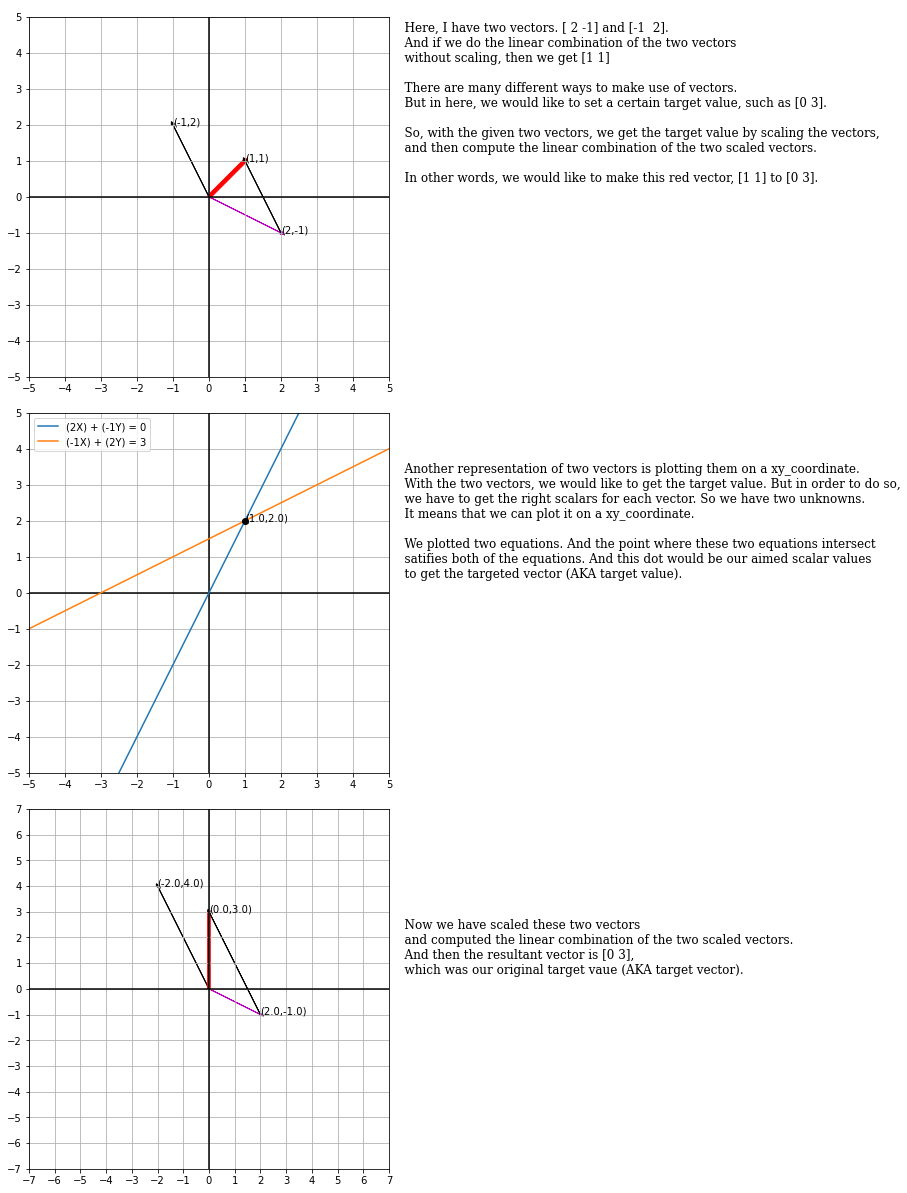

In [20]:
teach_me_vectors(v_1,v_2,target_value)

In [21]:
a1 = np.array([4,5])
a2 = np.array([-3,9])
a3 = np.array([3,-15])

Wall time: 9.82 s


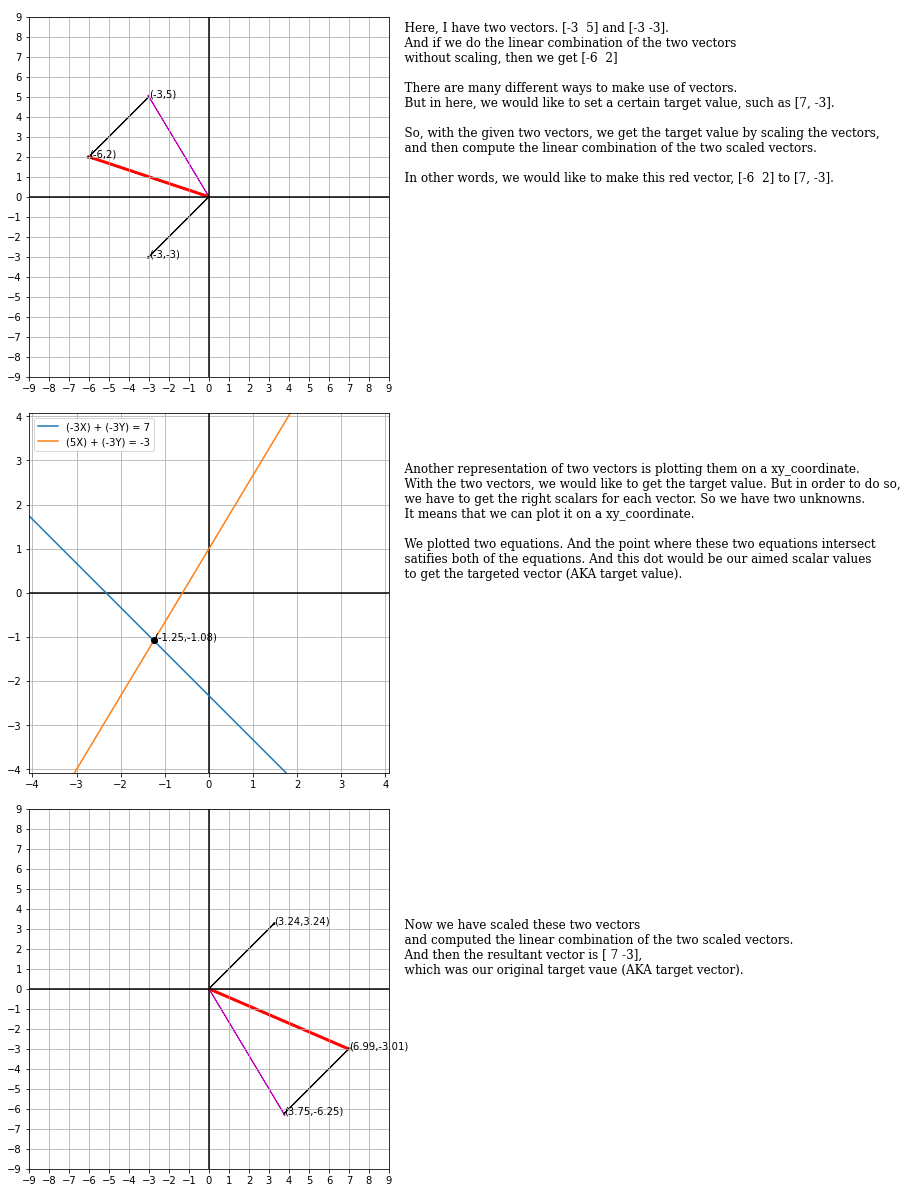

In [22]:
%%time
teach_me_vectors([-3,5], [-3,-3], [7,-3])